In [3]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [20]:
# import data
df = pd.read_csv(r'../data/processed/Cargo Theft 2020.csv')
df

,Year-Quarter,Day,Date,City,State,"City, ST",Country,Commodity,Value,Type of Loss,Location,Additional Information,Recovery?,Time,General Category
0,2020-Q1,Wednesday,1/1/20,Garland,TX,"Garland, TX",USA,Motor oil,"$100,000",Cargo theft,Secure yard,No additional details,NaN,Overnight,Automobile & Parts
1,2020-Q1,Wednesday,1/1/20,Memphis,TN,"Memphis, TN",USA,Gas cylinders,"$10,000",Pilferage,Truck stop/Gas station,No additional details,NaN,Overnight,Construction & Industrial goods
2,2020-Q1,Wednesday,1/1/20,Ocala,FL,"Ocala, FL",USA,Televisions,"$137,000",Cargo theft,Secure yard,No additional details,NaN,Overnight,Consumer electronics
3,2020-Q1,Wednesday,1/1/20,South Holland,IL,"South Holland, IL",USA,Cell phones,"$100,000",Cargo theft,Truck stop/Gas station,East Tollway,NaN,NaN,Consumer electronics
4,2020-Q1,Friday,1/3/20,Zion,IL,"Zion, IL",USA,Mixed goods,$-,Seal break,Truck stop/Gas station,Russel Rd,No loss,Overnight,Mixed cargo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2020-Q3,Sunday,8/30/20,NaN,TN,", TN",USA,Soft drinks,NaN,Cargo theft,Unspecified,No additional details,NaN,NaN,Food & Drinks
479,2020-Q3,Sunday,8/30/20,NaN,TX,", TX",USA,Tires,NaN,Cargo theft,Unspecified,17 & 19 inch,NaN,NaN,Automobile & Parts
480,2020-Q3,Tuesday,9/1/20,NaN,TX,", TX",USA,Tools,NaN,Pilferage,Truck stop/Gas station,No additional details,NaN,NaN,Construction & Industrial goods
481,2020-Q3,Tuesday,9/1/20,NaN,ON,", ON",CAN,Mixed cargo,NaN,Pilferage,Truck stop/Gas station,No additional details,NaN,NaN,Mixed cargo


<AxesSubplot:>

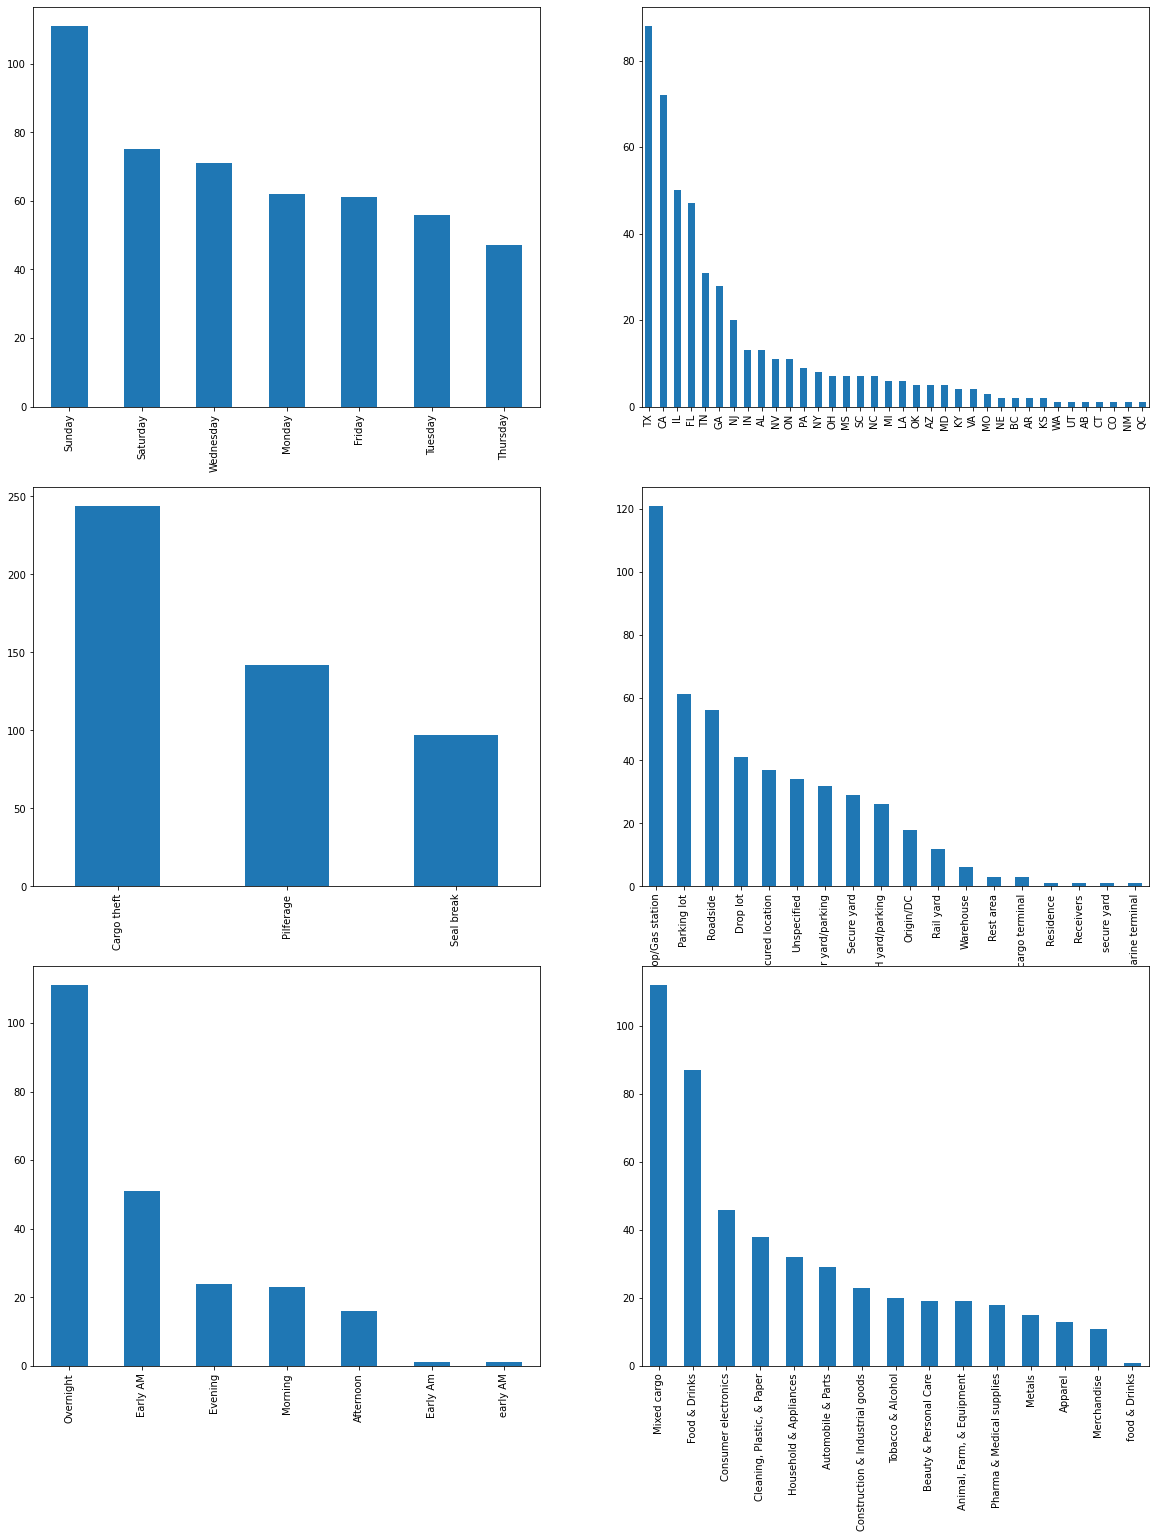

In [27]:
# data overview

fig, [[ax1, ax2],[ax3, ax4], [ax5, ax6]] = plt.subplots(3,2,figsize=(20,25))

pd.value_counts(df['Day']).plot(kind='bar', ax=ax1)
pd.value_counts(df['State']).plot(kind='bar', ax=ax2)
pd.value_counts(df['Type of Loss']).plot(kind='bar', ax=ax3)
pd.value_counts(df['Location']).plot(kind='bar', ax=ax4)
pd.value_counts(df['Time']).plot(kind='bar', ax=ax5)
pd.value_counts(df['General Category']).plot(kind='bar', ax=ax6)


In [ ]:
# correlation
